## 데이터 로드

In [11]:
import pandas as pd

train = pd.read_csv(',/data/train.csv')
test = pd.read_csv('./data/test.csv')

In [13]:
train.shape[0]

76888

In [14]:
test.shape[0]

74121

## 글자수 분포

In [18]:
# 글자수 컬럼 생성

train['len'] = train['label'].str.len()
train

,id,img_path,label,len
0,TRAIN_00000,./train/TRAIN_00000.png,빨간색,3
1,TRAIN_00001,./train/TRAIN_00001.png,머,1
2,TRAIN_00002,./train/TRAIN_00002.png,차차,2
3,TRAIN_00003,./train/TRAIN_00003.png,써,1
4,TRAIN_00004,./train/TRAIN_00004.png,놓치다,3
...,...,...,...,...
76883,TRAIN_76883,./train/TRAIN_76883.png,회,1
76884,TRAIN_76884,./train/TRAIN_76884.png,겪다,2
76885,TRAIN_76885,./train/TRAIN_76885.png,벨트,2
76886,TRAIN_76886,./train/TRAIN_76886.png,톼,1


In [19]:
train_len_count = pd.DataFrame(train['len'].value_counts())
train_len_count = train_len_count.reset_index()
train_len_count.columns = ['len', 'len_count']

display(train_len_count)

,len,len_count
0,2,28631
1,1,23703
2,3,13514
3,4,9988
4,5,1026
5,6,26


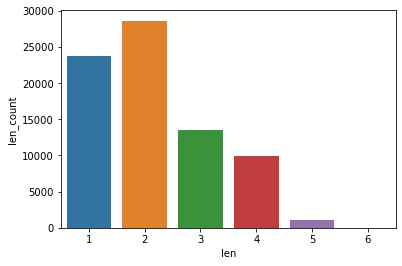

In [22]:
# 개수별 분포도

import seaborn as sns

sns.barplot(data=train_len_count, x='len', y='len_count');

In [36]:
import random
import pandas as pd
import numpy as np
import os

from PIL import Image
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') 
import seaborn as sns

import cv2 as cv

from tqdm.auto import tqdm

import warnings
warnings.filterwarnings(action='ignore') 

In [34]:
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

from torchvision.models import resnet18
from torchvision import transforms

from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [27]:
def show_image(Image, Picture_Name):
    plt.imshow(Image)
    plt.title(Picture_Name)
    plt.show()
    
def sample_df_by_len(df, n_sample, n_len, use_frac=False):
  cond = (df['len']==n_len)
  df = df.loc[cond]
  if use_frac == True:
    df = df.sample(frac=n_sample)
  else:
    df = df.sample(n=n_sample)
  return df

def show_sample_image(df, n_sample, n_len):
  df = sample_df_by_len(df, n_sample, n_len)
  for img, label in zip(df['img_path'], df['label']):
    img = cv.imread(img)
    show_image(img, label)

## 1글자 데이터

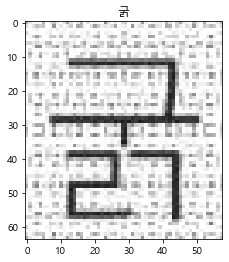

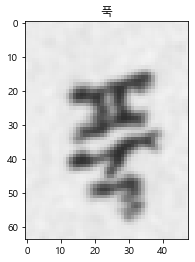

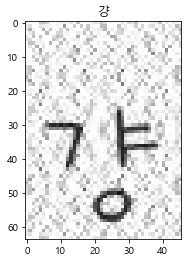

In [42]:
show_sample_image(df=train, n_sample=3, n_len=1)

## 2글자 데이터

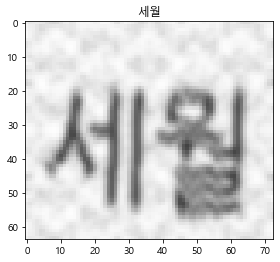

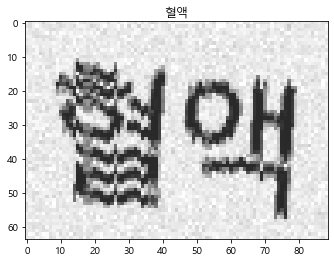

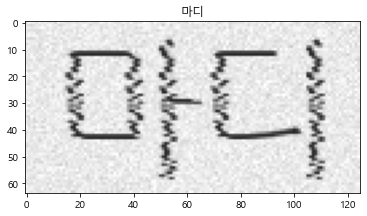

In [44]:
show_sample_image(df=train, n_sample=3, n_len=2)

## 3글자 데이터

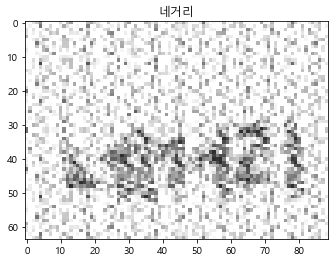

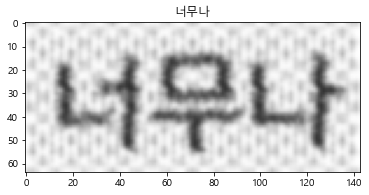

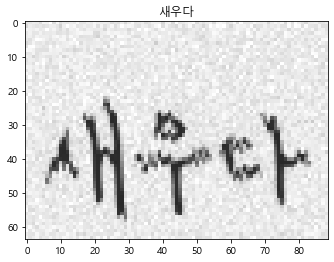

In [46]:
show_sample_image(df=train, n_sample=3, n_len=3)